In [4]:
using Polynomials, Plots, Interact


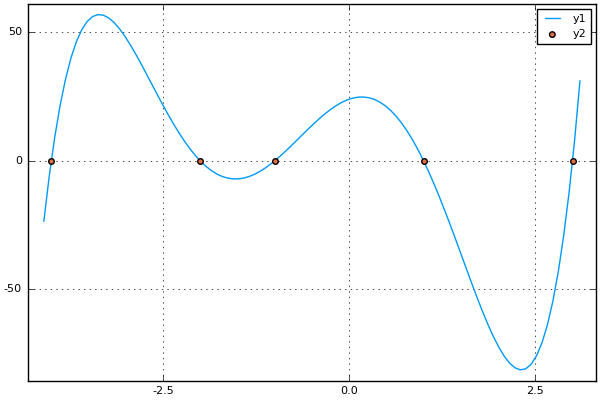

/Users/mpf/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [5]:
p = poly([-4,-2,-1,1,3]) # create a polynomial with these roots
xlim = (-4.1,3.1)
plot(t->p(t), xlim...)   # plot the polynomial
r = roots(p)             
scatter!(r,zeros(r))     # plot the computed roots (just to check)

In [6]:
p # Show the polynomial

Poly(24 + 10x - 27x^2 - 11x^3 + 3x^4 + x^5)

In [7]:
# Function to generate data from the polynormal.
function gen_data(p, m, η)
    srand(0)
    t = randn(m)
    noise = randn(m); noise *= η/norm(noise)
    b = p(t) + noise;
    return (t, b)  
end;

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"samples",50,0:100,"d",true)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"noise",50,0:100,"d",true)

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"degree",5,1:10,"d",true)


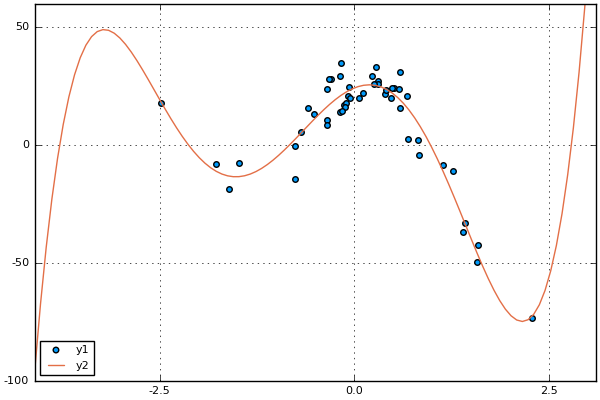

In [8]:
t = b = []
@manipulate for m=slider(0:100, label="samples"), η=slider(0:100, label="noise"), d=slider(1:10,label="degree")
    t, b = gen_data(p, m, η)
    pp = polyfit(t,b,d);
    scatter(t,b,xlim=xlim,ylim=(-100,60))
    plot!(t->pp(t), xlim...)
end


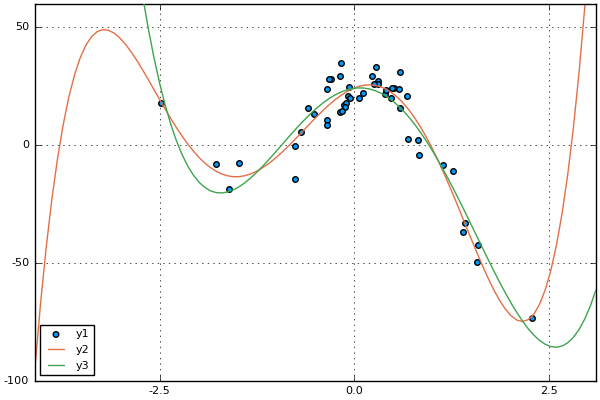

In [16]:
# Compute the fit manually.
m = 50; η = 50.0; d = 4
(t, b) = gen_data(p, m, η)
A = [ t[i]^k for i = 1:m, k = 0:d ]
c = A\b
pp = Poly(c)
plot!(t->pp(t),xlim...,ylim=(-100,60))

### Normal equations

Solve the least-squares problem using the normal equations $A^TA x = A^T b$. We'll use Julia's "backslash" solution $x_0=A\backslash b$ as the "true" solution.

In [17]:
x1 = (A'*A)\(A'*b)
x2 = A \ b
norm(x1-x2)

5.3364668722365855e-14

Now do it "manually" via LU.

In [18]:
L, U, p = lu(A'*A)
c = (A'*b)[p]
x = U \ (L\c);
norm(x - A\b)

4.623009201234653e-14

In [19]:
R = chol(A'*A)
c = A'*b
y = R' \ c
x = R \ y
norm(x - A\b)

1.4472130815335335e-13

In [20]:
Q, R = qr(A, );
println(size(A))
println(size(Q))

(50,5)
(50,5)


In [21]:
x = R \ (Q'*b)
norm(x - A\b)

1.2962537282957974e-14

In [22]:
r = b - A*x
norm(r)

52.990539451562896

In [23]:
Q, R = qr(A,thin=false)
Q1 = Q[:,1:5]
Q2 = Q[:,6:end];
size(Q2)

(50,45)

In [24]:
norm(Q2'*b)

52.99053945156292

In [25]:
B = A'*A
L, U, p = lu(B)
c = (A'*b)[p,:]
y = L \ c
x = U \  y
norm(x - A\b)

4.623009201234653e-14

In [26]:
Q, R = qr(A);
x = R \ (Q'*b)
x = A \ b
r = b - A*x
norm(r)

52.99053945156289

## Fitting


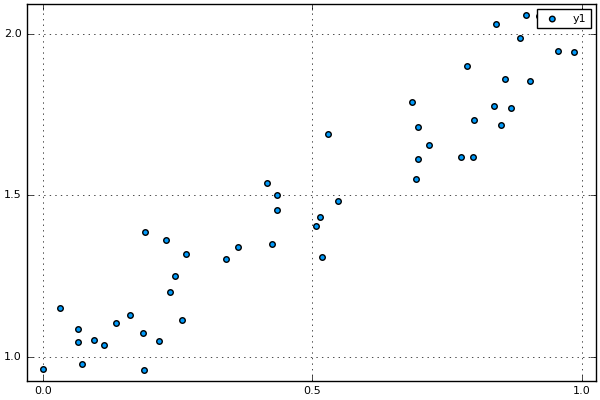

In [27]:
N = 50
f = t->(1+t)
x = rand(N)
y = f(x) + 0.1*randn(N);
scatter(x,y)

In [28]:
A = ones(N,2)
A[:,2] = x
θ1, θ2 = A \ y

2-element Array{Float64,1}:
 0.966109
 1.02765 


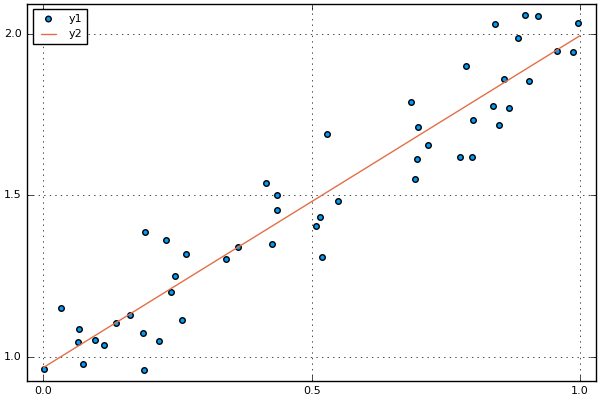

In [29]:
plot!(t->(θ1 + θ2*t), 0,1)